#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Why
- Alternative to Excel or R
- Based on Data Frames (think of it like a table) and Series (single column table / time series)

##Learning Pandas
* Almost anything you want to do is already a built-in function in Pandas.
* Before you decide to write a function to do some kind of operation on a Pandas object, scour the Pandas docs and StackOverflow
* http://pandas.pydata.org/pandas-docs/stable/index.html

#Objectives

- Create/Understand Series objects
- Create/Understand DataFrame objects
- Create and destroy new columns, apply functions to rows and columns
- Join/Merge Dataframes
- Use DataFrame grouping and aggregation
- Perform high-level EDA using Pandas

### Standard Imports

In [1]:
# By convention import pandas like:
import pandas as pd
import numpy as np

# For fake data.
from numpy.random import randn

#Series

Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

Integer valued series:

In [5]:
pd.Series(range(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Real valued series:

In [6]:
pd.Series(randn(10))

0   -0.716128
1   -2.144041
2   -0.478671
3   -0.369633
4   -1.256704
5    1.676028
6    2.303287
7   -0.899712
8    2.099438
9    1.076968
dtype: float64

String valued series:

In [9]:
pd.Series(list('Hello'*5))

0     H
1     e
2     l
3     l
4     o
5     H
6     e
7     l
8     l
9     o
10    H
11    e
12    l
13    l
14    o
15    H
16    e
17    l
18    l
19    o
20    H
21    e
22    l
23    l
24    o
dtype: object

#Indexes.

Notice how each series has an index (in this case a relatively meaningless default index). Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index---which helps optimize many operations.

In [10]:
# Sample index - each data point is labelled with a state.
index1 = ['California', 'Alabama', 'Indiana', 'Montana', 'Kentucky']
index2 = ['Washington', 'Alabama', 'Montana', 'Indiana', 'New York']

Labelled numeric series:

In [12]:
series1 = pd.Series(randn(5), index=index1)
series2 = pd.Series(randn(5), index=index2)
print series1, '\n'*2, series2

California    0.613596
Alabama       2.603107
Indiana      -0.419909
Montana       0.272422
Kentucky      0.453153
dtype: float64 

Washington   -0.425061
Alabama      -0.125008
Montana      -0.816445
Indiana      -0.687717
New York      0.021411
dtype: float64


The index is used to line up arithmetic operations.

In [13]:
series1 * series2

Alabama      -0.325408
California         NaN
Indiana       0.288778
Kentucky           NaN
Montana      -0.222418
New York           NaN
Washington         NaN
dtype: float64

Aggregation by index labels is easy (and optimized)

In [14]:
long_index = index1*3
long_series = pd.Series(randn(15), index=long_index)
print long_series

California   -0.473119
Alabama       1.918051
Indiana       0.056299
Montana       1.377398
Kentucky     -0.047957
California    0.075960
Alabama      -1.032127
Indiana      -0.987662
Montana      -0.106026
Kentucky      2.851602
California   -1.096594
Alabama      -0.364866
Indiana       2.027833
Montana      -0.543761
Kentucky      0.213405
dtype: float64


In [16]:
long_series.groupby(level=0).mean()

Alabama       0.173686
California   -0.497917
Indiana       0.365490
Kentucky      1.005684
Montana       0.242537
dtype: float64

Create a series indexed by dates

In [20]:
dt_index = pd.date_range(start='2015-01-01', end='2015-02-01', freq='D')
dt_series = pd.Series(randn(len(dt_index)), index=dt_index)
dt_series

2015-01-01   -0.588648
2015-01-02   -1.171275
2015-01-03    0.011166
2015-01-04    0.103774
2015-01-05   -0.086423
2015-01-06   -0.857403
2015-01-07   -0.922441
2015-01-08   -0.418754
2015-01-09   -1.424352
2015-01-10   -0.081160
2015-01-11   -3.004172
2015-01-12    0.029589
2015-01-13    1.983064
2015-01-14    0.974249
2015-01-15   -0.802847
2015-01-16    0.526191
2015-01-17    1.961443
2015-01-18    1.358712
2015-01-19   -0.903912
2015-01-20   -0.637021
2015-01-21    0.181189
2015-01-22   -0.211440
2015-01-23   -0.844324
2015-01-24   -1.351741
2015-01-25   -1.779263
2015-01-26    1.746959
2015-01-27   -0.392566
2015-01-28    1.309409
2015-01-29    0.724198
2015-01-30   -0.248055
2015-01-31   -1.639235
2015-02-01   -1.031128
Freq: D, dtype: float64

Closer look at the index values

Resample by week

In [22]:
dt_series.resample('W', how='mean')

2015-01-04   -0.411246
2015-01-11   -0.970672
2015-01-18    0.861486
2015-01-25   -0.792359
2015-02-01    0.067083
Freq: W-SUN, dtype: float64

In [23]:
dt_series[dt_series.index > '2015-01-15']

2015-01-16    0.526191
2015-01-17    1.961443
2015-01-18    1.358712
2015-01-19   -0.903912
2015-01-20   -0.637021
2015-01-21    0.181189
2015-01-22   -0.211440
2015-01-23   -0.844324
2015-01-24   -1.351741
2015-01-25   -1.779263
2015-01-26    1.746959
2015-01-27   -0.392566
2015-01-28    1.309409
2015-01-29    0.724198
2015-01-30   -0.248055
2015-01-31   -1.639235
2015-02-01   -1.031128
Freq: D, dtype: float64

#DataFrames
Data frames extend the concept of Series to table-like data.

From a dictionary of series or list

In [29]:
s1 = pd.Series(randn(10), index=dt_index[:10])
s2 = randn(10)
pd.DataFrame({'Col1': s1, 'Col2': s2}, index=dt_index[:10])

,Col1,Col2
2015-01-01,0.629878,-1.384267
2015-01-02,0.622596,0.256378
2015-01-03,-1.719691,0.762129
2015-01-04,0.006507,-0.008651
2015-01-05,0.743829,1.702448
2015-01-06,0.945202,-1.138177
2015-01-07,-1.248493,-1.665939
2015-01-08,0.897062,-0.047446
2015-01-09,-1.549780,0.074741
2015-01-10,1.334176,1.324930


In [35]:
df = pd.DataFrame(randn(10, 5), index=dt_index[:10], columns=list('abcde'))
df

,a,b,c,d,e
2015-01-01,-1.769411,0.938537,0.331920,1.551715,-0.584717
2015-01-02,0.006752,1.521851,-0.912663,0.071726,0.493994
2015-01-03,-2.090992,0.110466,0.837336,-1.271253,-0.606490
2015-01-04,-2.023040,-0.315013,1.002051,-1.328461,1.415243
2015-01-05,-0.501356,-0.012196,0.048649,1.387583,0.096582
2015-01-06,-1.703240,0.174825,1.341617,0.854288,-1.992206
2015-01-07,0.207011,0.228309,-2.050111,1.976408,-0.917464
2015-01-08,1.124203,-1.181984,0.794680,1.142022,-0.945460
2015-01-09,1.194385,-0.449807,-0.607191,-0.007898,-0.866582
2015-01-10,0.011246,-0.194441,-1.044778,-0.293339,0.017842


In [33]:
randn(10, 5)

array([[-0.87693475, -1.05208199,  0.11507214,  0.1523513 , -0.93118694],
       [-0.01053328, -0.85706065, -0.41090588,  0.71435748,  0.81368101],
       [ 0.26930004,  0.64618464, -1.56682912,  0.70465016, -1.28295742],
       [ 0.58557761,  0.46911331,  0.17350896, -0.34511408,  0.24600952],
       [ 2.0014056 , -0.80371267,  1.34096034, -0.15797346,  1.15284211],
       [ 0.31653032, -0.49223724,  1.03224676, -0.91498974, -1.35842781],
       [-0.85807618, -2.26928295, -0.02203827, -1.96497758, -1.48098976],
       [-0.22994956, -0.50773617, -0.30116504,  1.33261247,  0.95909645],
       [-0.08585868, -0.43923242, -0.54024596,  1.22225653, -0.45341718],
       [-2.02390749, -0.60704094, -0.34790897, -1.88986307,  1.12745336]])

Dataframes can be indexed (selected) by label, numeric index (avoid if possible), and boolean.

Using labels

In [36]:
df[['a', 'b']]

,a,b
2015-01-01,-1.769411,0.938537
2015-01-02,0.006752,1.521851
2015-01-03,-2.090992,0.110466
2015-01-04,-2.023040,-0.315013
2015-01-05,-0.501356,-0.012196
2015-01-06,-1.703240,0.174825
2015-01-07,0.207011,0.228309
2015-01-08,1.124203,-1.181984
2015-01-09,1.194385,-0.449807
2015-01-10,0.011246,-0.194441


Using indexes

In [38]:
df[:'2015-01-05']

,a,b,c,d,e
2015-01-01,-1.769411,0.938537,0.331920,1.551715,-0.584717
2015-01-02,0.006752,1.521851,-0.912663,0.071726,0.493994
2015-01-03,-2.090992,0.110466,0.837336,-1.271253,-0.606490
2015-01-04,-2.023040,-0.315013,1.002051,-1.328461,1.415243
2015-01-05,-0.501356,-0.012196,0.048649,1.387583,0.096582


Using booleans

In [52]:
df[(df.a > 0) & (df.b < 0) | (df.c > 1)]

,a,b,c,d,e
2015-01-04,-2.023040,-0.315013,1.002051,-1.328461,1.415243
2015-01-06,-1.703240,0.174825,1.341617,0.854288,-1.992206
2015-01-08,1.124203,-1.181984,0.794680,1.142022,-0.945460
2015-01-09,1.194385,-0.449807,-0.607191,-0.007898,-0.866582
2015-01-10,0.011246,-0.194441,-1.044778,-0.293339,0.017842


Each column is a series

In [42]:
print df.a
print type(df.a)

2015-01-01   -1.769411
2015-01-02    0.006752
2015-01-03   -2.090992
2015-01-04   -2.023040
2015-01-05   -0.501356
2015-01-06   -1.703240
2015-01-07    0.207011
2015-01-08    1.124203
2015-01-09    1.194385
2015-01-10    0.011246
Freq: D, Name: a, dtype: float64
<class 'pandas.core.series.Series'>


Each row is a series

In [53]:
df.ix['2015-01-01']
type(df.ix['2015-01-01'])

pandas.core.series.Series

Every column shares the same index

In [47]:
print df.a.index
print df.b.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10'],
              dtype='datetime64[ns]', freq='D', tz=None)
DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10'],
              dtype='datetime64[ns]', freq='D', tz=None)


The index for each row is the column headers

In [54]:
df.ix['2015-01-01'].index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

#DataFrame basic operations

Load data from a delimited file.

In [65]:
file_path = '../data/playgolf.csv'
df = pd.read_csv(file_path, delimiter='|')
df.head(5)

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


Create a new column.

In [71]:
df['new'] = df.Temperature + df.Humidity
df.head(5)

,Date,Outlook,Temperature,Humidity,Windy,Result,new
0,07-01-2014,sunny,85,85,False,Don't Play,170
1,07-02-2014,sunny,80,90,True,Don't Play,170
2,07-03-2014,overcast,83,78,False,Play,161
3,07-04-2014,rain,70,96,False,Play,166
4,07-05-2014,rain,68,80,False,Play,148


Drop a column

In [72]:
df = df.drop('new', axis=1)
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


Delete a row

In [74]:
df = df.drop(13, axis=0)
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


Add a row

In [76]:
new_row = pd.DataFrame([['07-14-2014', 'foggy', 62, 90, False, 'Play']], index=[13], columns=df.columns)

In [79]:
pd.concat([df, new_row])

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


#Applying functions

Using existing functions

In [80]:
df.mean()

Temperature    73.769231
Humidity       80.307692
Windy           0.384615
dtype: float64

Creating and using an arbitrary function

In [84]:
fun = lambda x: x**2
df.Temperature.apply(fun)

0     7225
1     6400
2     6889
3     4900
4     4624
5     4225
6     4096
7     5184
8     4761
9     5625
10    5625
11    5184
12    6561
Name: Temperature, dtype: int64

Using multiple values on each row

In [87]:
fun2 = lambda x, y: x + y
df.apply(lambda x: fun2(x.Temperature, x.Humidity), axis=1)

0     170
1     170
2     161
3     166
4     148
5     135
6     129
7     167
8     139
9     155
10    145
11    162
12    156
dtype: int64

#Summarizing dataframe

In [88]:
df.describe()

,Temperature,Humidity,Windy
count,13.000000,13.000000,13
mean,73.769231,80.307692,0.3846154
std,6.796492,10.241945,0.5063697
min,64.000000,65.000000,False
25%,69.000000,70.000000,0
50%,72.000000,80.000000,0
75%,80.000000,90.000000,1
max,85.000000,96.000000,True


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 6 columns):
Date           13 non-null object
Outlook        13 non-null object
Temperature    13 non-null int64
Humidity       13 non-null int64
Windy          13 non-null bool
Result         13 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 637.0+ bytes


#Index manipulation

Set index

In [92]:
df = df.set_index(['Date'])

In [93]:
df

,Outlook,Temperature,Humidity,Windy,Result
Date,,,,,
07-01-2014,sunny,85,85,False,Don't Play
07-02-2014,sunny,80,90,True,Don't Play
07-03-2014,overcast,83,78,False,Play
07-04-2014,rain,70,96,False,Play
07-05-2014,rain,68,80,False,Play
07-06-2014,rain,65,70,True,Don't Play
07-07-2014,overcast,64,65,True,Play
07-08-2014,sunny,72,95,False,Don't Play
07-09-2014,sunny,69,70,False,Play


Reset index

In [95]:
df = df.reset_index()
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


#Grouping (split-apply-combine)

Get averages for each outlook

In [97]:
df.groupby('Outlook').mean().reset_index()

,Outlook,Temperature,Humidity,Windy
0,overcast,75.0,77.0,0.50
1,rain,69.5,81.5,0.25
2,sunny,76.2,82.0,0.40


Initialize a groupby object---and iterate through the groupings

In [101]:
grouped = df.groupby(['Windy', 'Result'])
for name, group in grouped:
    print name
    print group, '\n'

(False, "Don't Play")
         Date Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014   sunny           85        85  False  Don't Play
7  07-08-2014   sunny           72        95  False  Don't Play 

(False, 'Play')
          Date   Outlook  Temperature  Humidity  Windy Result
2   07-03-2014  overcast           83        78  False   Play
3   07-04-2014      rain           70        96  False   Play
4   07-05-2014      rain           68        80  False   Play
8   07-09-2014     sunny           69        70  False   Play
9   07-10-2014      rain           75        80  False   Play
12  07-13-2014  overcast           81        75  False   Play 

(True, "Don't Play")
         Date Outlook  Temperature  Humidity Windy      Result
1  07-02-2014   sunny           80        90  True  Don't Play
5  07-06-2014    rain           65        70  True  Don't Play 

(True, 'Play')
          Date   Outlook  Temperature  Humidity Windy Result
6   07-07-2014  overcast           64       

Get the mean for each group

In [105]:
grouped.aggregate(sum)

Temperature  Humidity
Windy Result                           
False Don't Play          157       180
      Play                446       479
True  Don't Play          145       160
      Play                211       225

Normalize by the group each date belonged in

In [106]:
grouped.transform(lambda x: (x - x.mean()) / x.std())

,Temperature,Humidity
0,0.707107,-0.707107
1,0.707107,0.707107
2,1.345868,-0.208973
3,-0.672934,1.842762
4,-0.983519,0.018998
5,-0.707107,-0.707107
6,-1.113800,-0.755929
7,-0.707107,0.707107
8,-0.828227,-1.120855
9,0.103528,0.018998


Summarize by each group

In [109]:
grouped.describe().T

Windy            False                                                    \
Result      Don't Play                                              Play   
                 count  mean       std min    25%   50%    75% max count   
Humidity             2  90.0  7.071068  85  87.50  90.0  92.50  95     6   
Temperature          2  78.5  9.192388  72  75.25  78.5  81.75  85     6   

Windy                  ...      True                                       \
Result                 ... Don't Play      Play                             
                  mean ...        75% max count       mean        std min   
Humidity     79.833333 ...      85.00  90     3  75.000000  13.228757  65   
Temperature  74.333333 ...      76.25  80     3  70.333333   5.686241  64   

Windy                            
Result                           
              25% 50%   75% max  
Humidity     67.5  70  80.0  90  
Temperature  68.0  72  73.5  75  

[2 rows x 32 columns]

#Cross Comparison

In [110]:
pd.crosstab(df.Outlook, df.Result)

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,1,3
sunny,3,2


#Charting

In [111]:
#this enables charts to show inside iPython Notebook
from matplotlib import pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107a06410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107b42110>]], dtype=object)

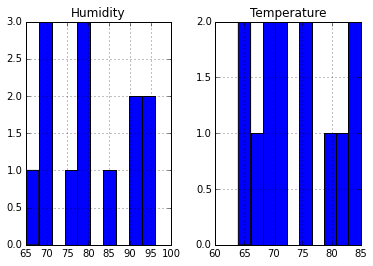

In [112]:
df[['Humidity', 'Temperature']].hist(bins=10)

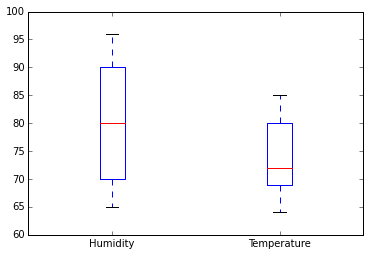

In [113]:
df[['Humidity', 'Temperature']].plot(kind='box')

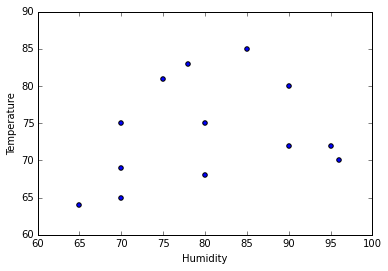

In [114]:
df.plot('Humidity', 'Temperature', kind='scatter')

#Using pandas with sql

In [115]:
import psycopg2 as pg2

In [116]:
conn = pg2.connect(dbname='test', user='minghuang', host = 'localhost')

In [117]:
query = '''
        SELECT *
        FROM logins
        LIMIT 30;
        '''

In [120]:
pd.read_sql(query, conn).head(10)

,userid,tmstmp,type
0,579,2013-11-20 03:20:06,mobile
1,823,2013-11-20 03:20:49,web
2,953,2013-11-20 03:28:49,web
3,612,2013-11-20 03:36:55,web
4,269,2013-11-20 03:43:13,web
5,799,2013-11-20 03:56:55,web
6,890,2013-11-20 04:02:33,mobile
7,330,2013-11-20 04:54:59,mobile
8,628,2013-11-20 04:57:22,mobile
9,398,2013-11-20 05:03:19,mobile


In [121]:
conn.close()

#We're done with the Pandas tutorial, but.....

here are some examples showing how to redo the SQL assignment in Pandas, plus Exploratory Data Analysis using Pandas using the stuffs you just learnt (hopefully).

#ReadyChef
[Data](https://www.dropbox.com/sh/5sm9nvnh6b4m8d0/AABQyediVavAdsjnoEUBEyYCa?dl=0)

Download, unzip and place the readychef directory in pandas-tutorial/data

In [ ]:
meals = pd.read_csv('../data/readychef/meals.csv')
events = pd.read_csv('../data/readychef/events.csv')
referrals = pd.read_csv('../data/readychef/referrals.csv')
users = pd.read_csv('../data/readychef/users.csv')
visits = pd.read_csv('../data/readychef/visits.csv')

Select statements
===================

1. To get an understanding of the data, run a [SELECT](http://www.postgresqltutorial.com/postgresql-select/) statement on each table. Keep all the columns and limit the number of rows to 10.

2. Write a `SELECT` statement that would get just the userids.

3. Maybe you're just interested in what the campaign ids are. Use 'SELECT DISTINCT' to figure out all the possible values of that column.

    *Note:*  Pinterest=PI, Facebook=FB, Twitter=TW, and Reddit=RE

In [ ]:
#3
users.campaign_id.unique()
users.campaign_id.value_counts()

Where Clauses / Filtering
========================================

Now that we have the lay of the land, we're interested in the subset of users that came from Facebook (FB). If you're unfamiliar with SQL syntax, the [WHERE](http://www.postgresqltutorial.com/postgresql-where/) clause can be used to add a conditional to `SELECT` statements. This has the effect of only returning rows where the conditional evaluates to `TRUE`. 

*Note: Make sure you put string literals in single quotes, like `campaign_id='TW'`.*

1. Using the `WHERE` clause, write a new `SELECT` statement that returns all rows where `Campaign_ID` is equal to `FB`.

2. We don't need the campaign id in the result since they are all the same, so only include the other two columns.

    Your output should be something like this:

    ```
     userid |     dt
    --------+------------
          3 | 2013-01-01
          4 | 2013-01-01
          5 | 2013-01-01
          6 | 2013-01-01
          8 | 2013-01-01
    ...
    ```


In [ ]:
# can also use users.ix[users.campaign_id=='FB']
users[users['campaign_id']=='FB'][['userid', 'dt']].head(10)

Aggregation Functions
=======================



6. Now get the average price, the min price and the max price for each meal type. Don't forget the group by statement!

    Your output should look like this:

    ```
        type    |         avg         | min | max
    ------------+---------------------+-----+-----
     mexican    |  9.6975945017182131 |   6 |  13
     french     | 11.5420000000000000 |   7 |  16
     japanese   |  9.3804878048780488 |   6 |  13
     italian    | 11.2926136363636364 |   7 |  16
     chinese    |  9.5187165775401070 |   6 |  13
     vietnamese |  9.2830188679245283 |   6 |  13
    (6 rows)
    ```



In [ ]:
meals.groupby('type')['price'].aggregate({'avg': np.mean,
                                          'min': np.min,
                                          'max': np.max})

Joins
=========================

Now we are ready to do operations on multiple tables. A [JOIN](http://www.tutorialspoint.com/postgresql/postgresql_using_joins.htm) allows us to combine multiple tables.

1. Write a query to get one table that joins the `events` table with the `users` table (on `userid`) to create the following table.

    ```
     userid | campaign_id | meal_id | event
    --------+-------------+---------+--------
          3 | FB          |      18 | bought
          7 | PI          |       1 | like
         10 | TW          |      29 | bought
         11 | RE          |      19 | share
         15 | RE          |      33 | like
    ...
    ```



In [ ]:
events.merge(users, how='inner', left_on='userid', right_on='userid')[['userid', 'meal_id', 'campaign_id']].head(3)

Extra Credit
========================
1. Answer the question, _"What user from each campaign bought the most items?"_

    It will be helpful to create a temporary table that contains the counts of the number of items each user bought. You can create a table like this: `CREATE TABLE mytable AS SELECT...`

In [ ]:
# Get a table with user, campaign, and event
comb = users.merge(events, on='userid')[['userid', 'campaign_id', 'event']]
# Get the number of buys for each user/campaign combination
agg = comb.groupby(['userid', 'campaign_id'])['event'].aggregate({'num_buys': lambda x: sum(x=='bought')}).reset_index()
# Add a column of max number of buys per campaign
agg['max_buys'] = agg.groupby('campaign_id')['num_buys'].transform(np.max)
# Find the users with the maximum buys
agg.ix[agg.num_buys == agg.max_buys]

#Exploratory Data Analysis with Pandas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('../data/playgolf.csv', delimiter='|' )
print df.head()

#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [ ]:
df.describe()

Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

In [ ]:
# Side-by-side histograms
df[['Humidity', 'Temperature']].hist(bins=5)

In [ ]:
# Box plot
df[['Humidity', 'Temperature']].plot(kind='box')

###Scatterplots for examining bivariate relationships (kind=scatter)

In [ ]:
df.plot('Humidity', 'Temperature', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [ ]:
grouped = df.groupby('Outlook')
for name, group in grouped:
    plt.plot(group.Humidity, group.Temperature, label=name, marker='o', linestyle='')
plt.legend(numpoints=1)
plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [ ]:
df.Outlook.value_counts()

###Using apply will get you the value counts for multiple columns at once

In [ ]:
df.head()

###Contingency Tables for looking at bivariate relationships between two categorical variables (pd.crosstab)

In [ ]:
pd.crosstab(df.Outlook, df.Result)

###Often we want the row percentages

In [ ]:
pd.crosstab(df.Outlook, df.Result).apply(lambda x: x/x.sum(), axis=0)

###Or the column percentages

In [ ]:
pd.crosstab(df.Outlook, df.Result).apply(lambda x: x/x.sum(), axis=1)

#Enough...lets get to the pair sprint